<a href="https://colab.research.google.com/github/raghavmemani/ANDROID_ACEESIBILITY/blob/master/Seatle_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import pandas as pd
import numpy

In [148]:
df=pd.read_csv('/content/seattle-weather.csv')

In [149]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [150]:
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [151]:
x=df.drop(columns=['date','weather'])
x

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [152]:
y=df['weather']
y

,weather
0,drizzle
1,rain
2,rain
3,rain
4,rain
...,...
1456,rain
1457,rain
1458,fog
1459,sun


In [153]:
from sklearn.model_selection import train_test_split

In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [155]:
x_train

,precipitation,temp_max,temp_min,wind
523,0.0,21.7,13.3,3.2
1360,0.0,18.9,7.8,2.0
866,0.0,20.0,11.7,4.1
508,4.1,12.2,6.7,1.9
1265,0.5,23.9,13.3,3.2
...,...,...,...,...
466,1.5,12.2,6.7,3.8
299,1.5,11.1,7.2,2.5
493,0.0,19.4,11.1,1.9
527,0.0,20.0,10.0,5.7


In [156]:
from sklearn.linear_model import LogisticRegression

In [157]:
model=LogisticRegression()

In [158]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [159]:
prediction=model.predict(x_test)

In [160]:
prediction

array(['rain', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'rain', 'sun',
       'rain', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun',
       'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'rain', 'rain',
       'rain', 'rain', 'sun', 'rain', 'rain', 'rain', 'rain', 'rain',
       'sun', 'sun', 'rain', 'rain', 'rain', 'sun', 'rain', 'rain',
       'rain', 'rain', 'rain', 'rain', 'sun', 'sun', 'rain', 'rain',
       'rain', 'rain', 'rain', 'sun', 'sun', 'snow', 'rain', 'sun',
       'rain', 'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'sun', 'sun',
       'rain', 'rain', 'rain', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun',
       'rain', 'sun', 'rain', 'rain', 'rain', 'sun', 'sun', 'rain',
       'rain', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'rain',
       'sun', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain', 'rain',
       'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'rain', 'sun',
       'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 's

In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [162]:
from sklearn.model_selection import GridSearchCV
params = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid = GridSearchCV(LogisticRegression(), params, cv=5)
grid.fit(x_train, y_train)
model = grid.best_estimator_


In [163]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)


RandomForestClassifier()

In [164]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

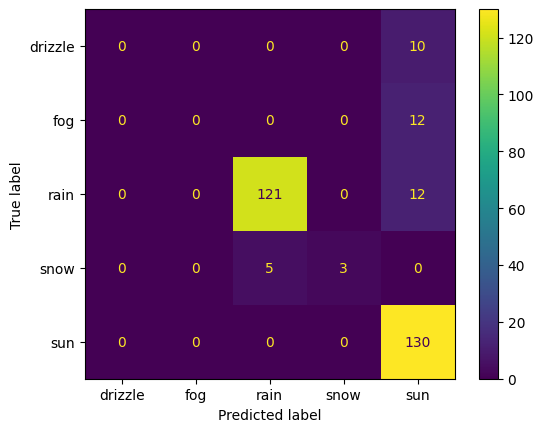

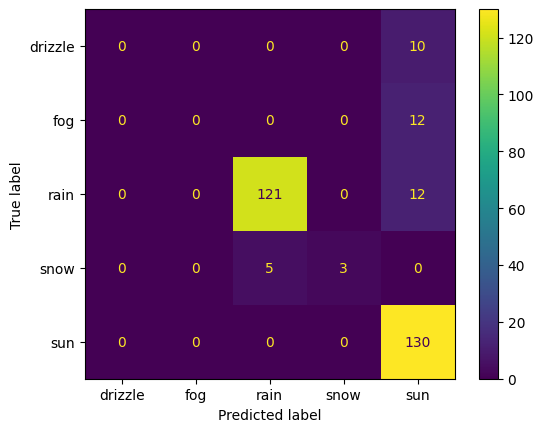

In [165]:
!pip install -U scikit-learn  # Update scikit-learn to the latest version
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
# OR
# cm = ConfusionMatrixDisplay.from_predictions(y_test, model.predict(x_test))
cm.plot()
plt.show()

In [166]:
from sklearn.metrics import classification_report

In [167]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        10
         fog       0.00      0.00      0.00        12
        rain       0.96      0.93      0.95       133
        snow       1.00      0.38      0.55         8
         sun       0.81      1.00      0.89       130

    accuracy                           0.88       293
   macro avg       0.55      0.46      0.48       293
weighted avg       0.82      0.88      0.84       293



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [168]:
test_weather={'precipitation':10,	'temp_max':20,
              'temp_min':30,
              'wind':40}

test_df=pd.DataFrame([test_weather])
test_df


,precipitation,temp_max,temp_min,wind
0,10,20,30,40


In [169]:
model.predict(test_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array(['rain'], dtype=object)

In [170]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 87.71%


In [171]:
from sklearn.svm import SVC

# Train and predict
model_svc = SVC()
model_svc.fit(x_train, y_train)
predictions_svc = model_svc.predict(x_test)

# Check accuracy
accuracy_svc = accuracy_score(y_test, predictions_svc)
print(f"SVM Accuracy: {accuracy_svc * 100:.2f}%")


SVM Accuracy: 80.20%


In [172]:
from sklearn.neural_network import MLPClassifier

# Train and predict
model_mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500)
model_mlp.fit(x_train, y_train)
predictions_mlp = model_mlp.predict(x_test)

# Check accuracy
accuracy_mlp = accuracy_score(y_test, predictions_mlp)
print(f"Neural Network Accuracy: {accuracy_mlp * 100:.2f}%")


Neural Network Accuracy: 88.40%


In [173]:
from sklearn.ensemble import GradientBoostingClassifier

# Train and predict
model_gbc = GradientBoostingClassifier()
model_gbc.fit(x_train, y_train)
predictions_gbc = model_gbc.predict(x_test)

# Check accuracy
accuracy_gbc = accuracy_score(y_test, predictions_gbc)
print(f"Gradient Boosting Accuracy: {accuracy_gbc * 100:.2f}%")


Gradient Boosting Accuracy: 85.32%


In [174]:
from sklearn.ensemble import RandomForestClassifier

# Train and predict
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
predictions_rf = model_rf.predict(x_test)

# Check accuracy
accuracy_rf = accuracy_score(y_test, predictions_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")


Random Forest Accuracy: 87.03%


In [175]:
!pip install catboost
#Import the library after installing it.
from catboost import CatBoostClassifier

model_cat = CatBoostClassifier(silent=True)
model_cat.fit(x_train, y_train)
predictions_cat = model_cat.predict(x_test)
accuracy_cat = accuracy_score(y_test, predictions_cat)
print(f"CatBoost Accuracy: {accuracy_cat * 100:.2f}%")

CatBoost Accuracy: 85.67%


In [176]:
from sklearn.ensemble import VotingClassifier

model_rf = RandomForestClassifier()
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_gbc = GradientBoostingClassifier()

voting_model = VotingClassifier(estimators=[
    ('rf', model_rf), ('xgb', model_xgb), ('gbc', model_gbc)],
    voting='hard'
)
voting_model.fit(x_train, y_train)
predictions_voting = voting_model.predict(x_test)
accuracy_voting = accuracy_score(y_test, predictions_voting)
print(f"Voting Classifier Accuracy: {accuracy_voting * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:14:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Accuracy: 85.67%
